In [ ]:
import pickle

In [ ]:
# import os
# import glob

# result_dir = "/mnt/userdata/jeon_mg/series/result"
# result_files = sorted(glob.glob(os.path.join(result_dir, "**/*.pickle")))

# results = []

# for file in result_files:
#     with open(file, "rb") as f:
#         res = pickle.load(f)
#     results.append(res)

# series_results = {k: [r[k] for r in results] for k in results[0].keys()}

series_result_dir = "/mnt/userdata/jeon_mg/series/result_nf2/series_result.pickle"

with open(series_result_dir, "rb") as f:
    series_results = pickle.load(f)

In [ ]:
series_results.keys()

dict_keys(['date', 'total_free_energy', 'total_energy', 'loss_force_free', 'loss_force_free_mean', 'loss_div_free', 'loss_div_free_mean', 'sigma_J', 'theta_J', 'theta_i_mean', 'norm_laplacian_B_mean', 'max_idx_0', 'norm_laplacian_B_max_0', 'max_idx_1', 'norm_laplacian_B_max_1', 'max_idx_2', 'norm_laplacian_B_max_2', 'max_idx_3', 'norm_laplacian_B_max_3', 'max_idx_4', 'norm_laplacian_B_max_4', 'max_idx_5', 'norm_laplacian_B_max_5', 'total_energy_pot', 'loss_force_free_pot', 'loss_force_free_mean_pot', 'loss_div_free_pot', 'loss_div_free_mean_pot', 'sigma_J_pot', 'theta_J_pot', 'theta_i_mean_pot', 'norm_laplacian_B_mean_pot', 'max_idx_0_pot', 'norm_laplacian_B_max_0_pot', 'max_idx_1_pot', 'norm_laplacian_B_max_1_pot', 'max_idx_2_pot', 'norm_laplacian_B_max_2_pot', 'max_idx_3_pot', 'norm_laplacian_B_max_3_pot', 'max_idx_4_pot', 'norm_laplacian_B_max_4_pot', 'max_idx_5_pot', 'norm_laplacian_B_max_5_pot'])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, DateFormatter

In [ ]:
x_dates = date2num(series_results["date"])
date_format = DateFormatter("%m/%d-%H:%M")

In [ ]:
from sunpy.net import Fido
from sunpy.net import attrs as a
from sunpy.timeseries import TimeSeries

In [ ]:
flares = Fido.search(
    a.Time(min(series_results["date"]), max(series_results["date"])),
    a.hek.EventType("FL"),
    a.hek.OBS.Observatory == "GOES",
)["hek"]

In [ ]:
filtered_results = flares[
    "event_starttime", "event_peaktime", "event_endtime", "fl_goescls", "ar_noaanum"
]
filtered_results

event_starttime,event_peaktime,event_endtime,fl_goescls,ar_noaanum
Time,Time,Time,str4,int64
2017-09-06 06:17:00.000,2017-09-06 06:22:00.000,2017-09-06 06:29:00.000,C1.6,12673
2017-09-06 07:29:00.000,2017-09-06 07:34:00.000,2017-09-06 07:48:00.000,C2.7,12673
2017-09-06 08:57:00.000,2017-09-06 09:10:00.000,2017-09-06 09:17:00.000,X2.2,12673
2017-09-06 11:53:00.000,2017-09-06 12:02:00.000,2017-09-06 12:10:00.000,X9.3,12673
2017-09-06 15:51:00.000,2017-09-06 15:56:00.000,2017-09-06 16:03:00.000,M2.5,12673
2017-09-06 19:21:00.000,2017-09-06 19:30:00.000,2017-09-06 19:35:00.000,M1.4,12673
2017-09-06 23:33:00.000,2017-09-06 23:39:00.000,2017-09-06 23:44:00.000,M1.2,0


In [ ]:
filtered_results_noaa = filtered_results[filtered_results["ar_noaanum"] == 12673]
filtered_results_noaa

event_starttime,event_peaktime,event_endtime,fl_goescls,ar_noaanum
Time,Time,Time,str4,int64
2017-09-06 06:17:00.000,2017-09-06 06:22:00.000,2017-09-06 06:29:00.000,C1.6,12673
2017-09-06 07:29:00.000,2017-09-06 07:34:00.000,2017-09-06 07:48:00.000,C2.7,12673
2017-09-06 08:57:00.000,2017-09-06 09:10:00.000,2017-09-06 09:17:00.000,X2.2,12673
2017-09-06 11:53:00.000,2017-09-06 12:02:00.000,2017-09-06 12:10:00.000,X9.3,12673
2017-09-06 15:51:00.000,2017-09-06 15:56:00.000,2017-09-06 16:03:00.000,M2.5,12673
2017-09-06 19:21:00.000,2017-09-06 19:30:00.000,2017-09-06 19:35:00.000,M1.4,12673


The current-weighted average of the sine of the angle between the magnetic field and the electrical current density

$$
\sigma_J = \frac{\sum_i \frac{|\vec{J}_i \times \vec{B}_i|}{B_i} }{\sum_i J_i} = \frac{\sum_i J_i \sigma_i}{\sum_i J_i}
$$

$$
\sigma_i = \frac{|\vec{J}_i \times \vec{B}_i|}{J_i B_i}
$$

current-weighted average angle $\theta_J$

$$
\theta_J = \arcsin (\sigma_J)
$$

average angle $<\theta_i>$

$$
\theta_i = \arcsin (\sigma_i)
$$

$<\theta_i>$ denotes the average angle over all grid points

Note that $\theta_J \neq <\theta_i>$

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

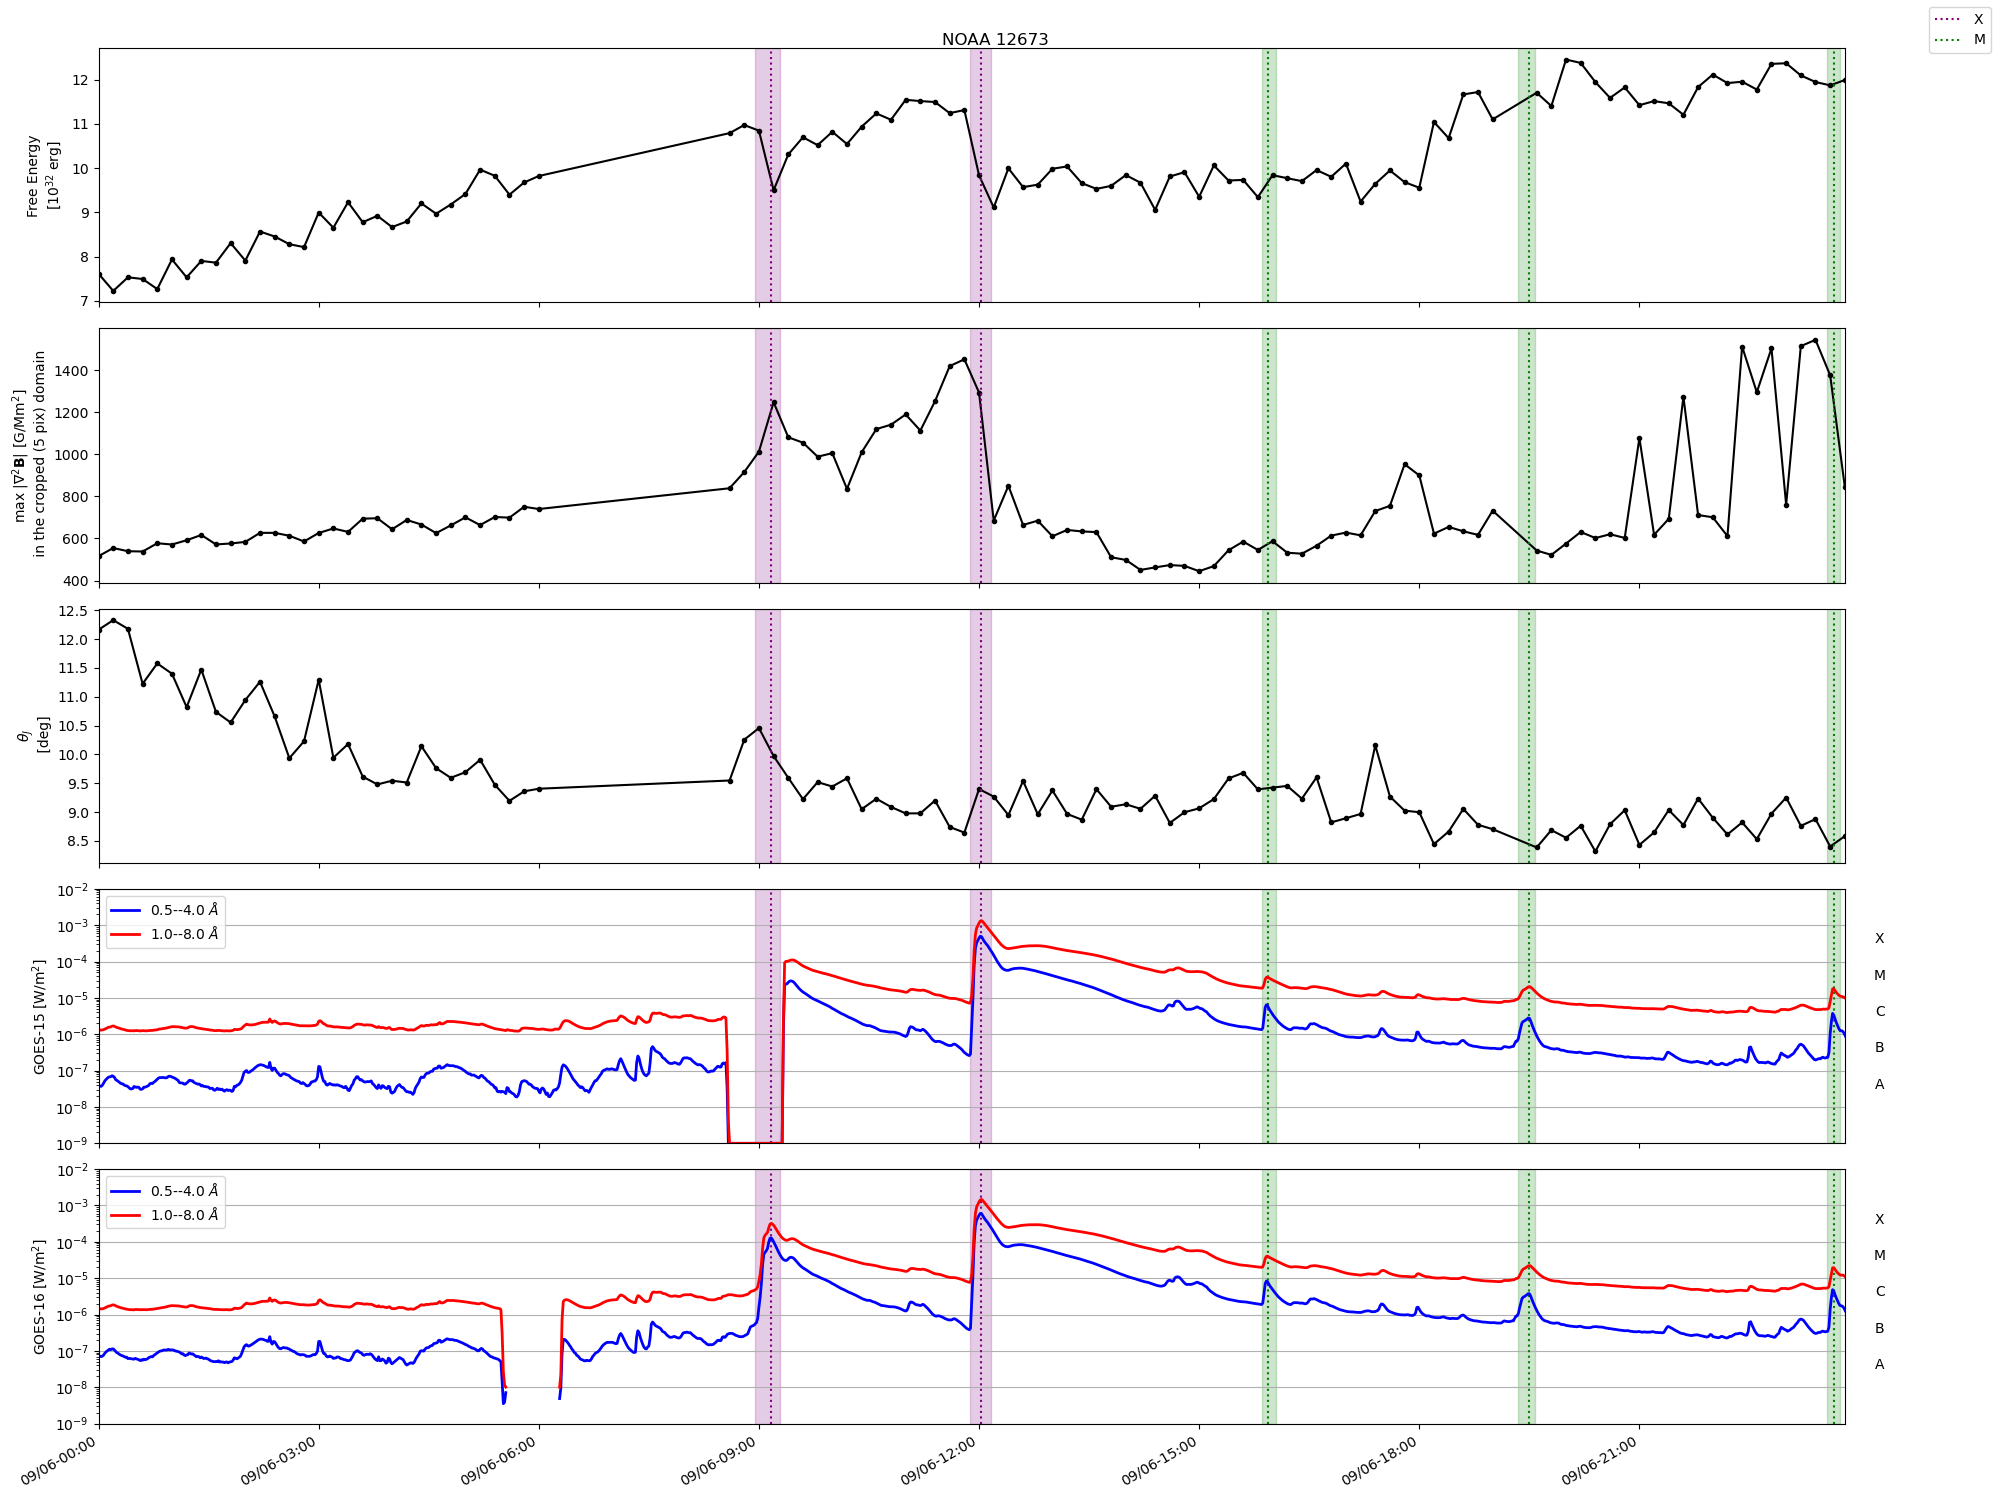

In [ ]:
fig, full_axs = plt.subplots(
    5, 2, figsize=(20, 15), gridspec_kw={"width_ratios": [1, 0.05]}
)
axs = full_axs[:, 0]
[ax.axis("off") for ax in full_axs[:, 1]]

for ax in axs:
    ax.xaxis_date()
    # ax.set_xlim(x_dates[0], x_dates[-1])
    ax.set_xlim(17415.0, 17415.991666666665)
    ax.xaxis.set_major_formatter(date_format)

fig.autofmt_xdate()

msize = 3

ax = axs[0]
ax.plot(
    x_dates,
    np.array(series_results["total_free_energy"]) * 1e-32,
    "ko-",
    markersize=msize,
)
ax.set_ylabel("Free Energy\n[$10^{32}$ erg]")

ax = axs[1]
# ax.plot(x_dates, np.array(series_results['norm_laplacian_B_max_0']), 'o-', markersize=2)
# ax.set_ylabel('max ' + r'|$\nabla^2 \mathbf{B}$|' + '\n in the whole domain')

# The cropped (5 pix) domain is the domain whose border (5 pixel) is removed
# to reduce the boundary effect of the finite difference method.
ax.plot(
    x_dates, np.array(series_results["norm_laplacian_B_max_5"]), "ko-", markersize=msize
)
ax.set_ylabel(
    "max "
    + r"|$\nabla^2 \mathbf{B}$|"
    + " [G/Mm$^2$]"
    + "\n in the cropped (5 pix) domain"
)

ax = axs[2]
ax.plot(x_dates, np.array(series_results["theta_J"]), "ko-", markersize=msize)
ax.set_ylabel(r"$\theta_J$" + "\n [deg]")

my_labels = {"M": "M", "X": "X"}
for st, pt, et, cl in zip(
    filtered_results_noaa["event_starttime"],
    filtered_results_noaa["event_peaktime"],
    filtered_results_noaa["event_endtime"],
    filtered_results_noaa["fl_goescls"],
):
    if cl[0] == "M":
        for ax in axs:
            ax.axvline(
                x=date2num(pt.datetime),
                linestyle="dotted",
                c="green",
                label=my_labels["M"],
            )
            ax.axvspan(
                date2num(st.datetime), date2num(et.datetime), alpha=0.2, color="green"
            )
            my_labels["M"] = "_nolegend_"
    elif cl[0] == "X":
        for ax in axs:
            ax.axvline(
                x=date2num(pt.datetime),
                linestyle="dotted",
                c="purple",
                label=my_labels["X"],
            )
            ax.axvspan(
                date2num(st.datetime), date2num(et.datetime), alpha=0.2, color="purple"
            )
            my_labels["X"] = "_nolegend_"

fig.suptitle("NOAA 12673")
fig.legend()

ax = axs[3]
# ax.plot(x_dates, np.array(series_results['theta_i_mean']), 'ko-', markersize=msize)
# ax.set_ylabel(r'$<\theta_i>$' + '\n [deg]')
results = Fido.search(
    a.Time(min(series_results["date"]), max(series_results["date"])),
    a.Instrument.xrs & a.goes.SatelliteNumber(15) & a.Resolution("avg1m")
    | a.hek.FL & (a.hek.FRM.Name == "SWPC"),
)  # NOQA
files = Fido.fetch(results)
goes = TimeSeries(files)
if type(goes) == list:
    goe = TimeSeries(goes, concatenate=True)
    goe.plot(axes=ax)
else:
    goes.plot(axes=ax)
ax.set_yscale("log")
ax.set_ylabel("GOES-15 [W/m$^2$]")

ax = axs[4]
# goes_long = goes.to_dataframe()['xrsa']
# ax.plot(goes_long.index, np.array(goes_long), color='black')

results = Fido.search(
    a.Time(min(series_results["date"]), max(series_results["date"])),
    a.Instrument.xrs & a.goes.SatelliteNumber(16) & a.Resolution("avg1m")
    | a.hek.FL & (a.hek.FRM.Name == "SWPC"),
)  # NOQA
files = Fido.fetch(results)
goes = TimeSeries(files)
if type(goes) == list:
    goe = TimeSeries(goes, concatenate=True)
    goe.plot(axes=ax)
else:
    goes.plot(axes=ax)
ax.set_yscale("log")
ax.set_ylabel("GOES-16 [W/m$^2$]")

plt.tight_layout()
plt.show()